# import Data

In [134]:
import pandas as pd

data = pd.read_excel("Data/Fraud Detection Dataset.xlsx", engine='openpyxl' )

# seprate the data

In [135]:
X = data.drop("Fraudulent", axis=1)  # All columns except the target
y = data["Fraudulent"]               # Target column (label)

# train test split

In [136]:
from sklearn.model_selection import train_test_split
# Split first
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"Feature=> train: {x_train.shape} - test: {x_test.shape}")
print(f"Label=> train: {y_train.shape} - test: {y_test.shape}")


Feature=> train: (3121, 11) - test: (781, 11)
Label=> train: (3121,) - test: (781,)


# Scale All Features Between 0 and 1

In [137]:
from sklearn.preprocessing import MinMaxScaler



# Then scale
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)     # Fit only on training data
x_test = scaler.transform(x_test)           # Transform test data using training fit


# Metric Calculation

In [138]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
   acc_train=accuracy_score(y_true=y_train,y_pred=y_pred_train)
   acc_test=accuracy_score(y_true=y_test,y_pred=y_pred_test)
   p=precision_score(y_true=y_test,y_pred=y_pred_test)
   r=recall_score(y_true=y_test,y_pred=y_pred_test)
   print(f"acc train : {acc_train} - acc test : {acc_test} - precision:{p} - recall: {r}")

   return acc_train,acc_test , p , r

# classification


# 1. Naive Bayes

In [18]:
# main.py

from model_sklearn import get_classifier

# Initialize the classifier
gnb = get_classifier(
    section="neighbors",
    model_name="KNeighborsClassifier",
    n_neighbors=8,
    algorithm="kd_tree",
    leaf_size=28
)
print(gnb)

# Now you can use classifier.fit(X_train, y_train), etc.


KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)


In [140]:
y_pred_train= gnb.predict(x_train)
y_pred_test= gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,p_gnb,r_gnb = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)


acc train : 0.5405318808074335 - acc test : 0.5224071702944942 - precision:0.5127272727272727 - recall: 0.37105263157894736


# 2.KNN

In [141]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=8,algorithm='kd_tree',leaf_size=28)
knn.fit(x_train,y_train)


,n_neighbors,8
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [142]:
y_pred_train= knn.predict(x_train)
y_pred_test= knn.predict(x_test)

acc_train_knn,acc_test_knn,p_knn,r_knn = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)


acc train : 0.631528356296059 - acc test : 0.4788732394366197 - precision:0.45161290322580644 - recall: 0.33157894736842103


# 3.decision tree

In [143]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=64, min_samples_split=2 , criterion="gini")
dt.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,64
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [144]:
y_pred_train= dt.predict(x_train)
y_pred_test= dt.predict(x_test)

acc_train_dt,acc_test_dt,p_dt,r_dt = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)


acc train : 1.0 - acc test : 0.5019206145966709 - precision:0.48812664907651715 - recall: 0.4868421052631579


# 4. Random Forest


In [145]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=1000, max_depth=32,min_samples_split=4)

rf.fit(x_train, y_train)  

,n_estimators,1000
,criterion,'gini'
,max_depth,32
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [146]:
y_pred_train= rf.predict(x_train)
y_pred_test= rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)


acc train : 1.0 - acc test : 0.4814340588988476 - precision:0.46612466124661245 - recall: 0.45263157894736844


# 5. SVM


In [147]:
from sklearn.svm import SVC
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [148]:
y_pred_train= svm.predict(x_train)
y_pred_test= svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)


acc train : 0.6177507209227812 - acc test : 0.49167733674775926 - precision:0.4768392370572207 - recall: 0.4605263157894737


# 6.Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [150]:
y_pred_train= lr.predict(x_train)
y_pred_test= lr.predict(x_test)

acc_train_lr,acc_test_lr,p_lr,r_lr = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)


acc train : 0.530919577058635 - acc test : 0.5121638924455826 - precision:0.49859943977591037 - recall: 0.46842105263157896


# 7.ANN

In [151]:
from sklearn.neural_network import MLPClassifier

ann=MLPClassifier()
ann.fit(x_train,y_train)

d:\Python\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(100,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [152]:
y_pred_train= ann.predict(x_train)
y_pred_test= ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)


acc train : 0.6289650752963794 - acc test : 0.5108834827144686 - precision:0.49698795180722893 - recall: 0.4342105263157895


# Comparision

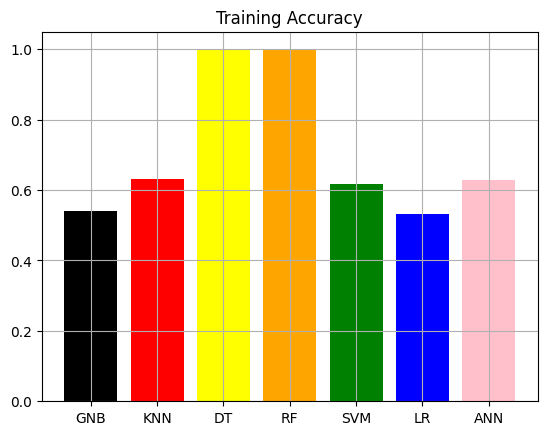

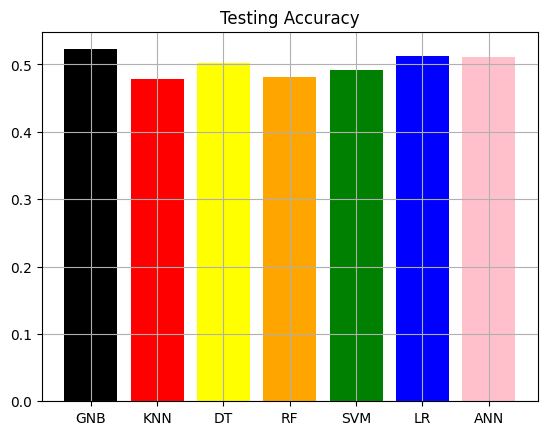

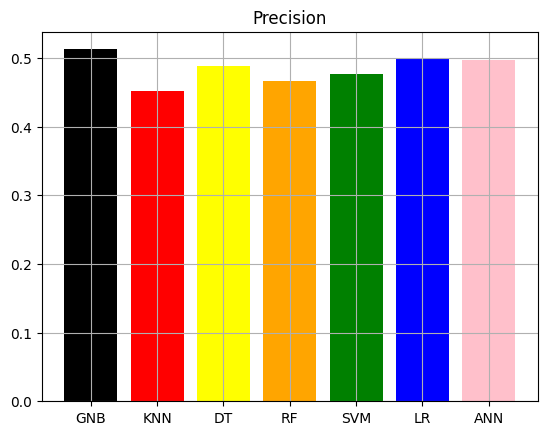

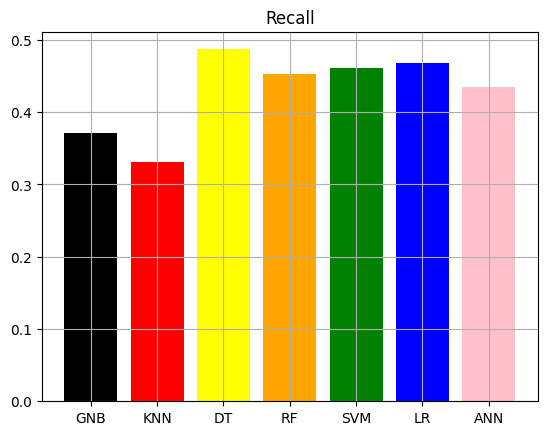

In [154]:
import matplotlib.pyplot as plt

# Chart 1: Training Accuracy
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ["GNB", "KNN", "DT", "RF", "SVM", "LR", "ANN"]
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

plt.bar(title, acc_train, color=colors)

plt.title("Training Accuracy")
plt.grid()
plt.show()

# Chart 2: Testing Accuracy
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]

plt.bar(title, acc_test, color=colors)
plt.title("Testing Accuracy")
plt.grid()
plt.show()

# Chart 3: Precision
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]

plt.bar(title, p, color=colors)
plt.title("Precision")
plt.grid()
plt.show()

# Chart 4: Recall
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]

plt.bar(title, r, color=colors)
plt.title("Recall")
plt.grid()
plt.show()


In [20]:
from src.data_loader import load_data
from src.preprocess import split_and_scale
from src.model_zoo import model_module

from src.evaluate import evaluate_model
from src.visualize import plot_metrics

# Load and prepare data
X, y = load_data("Data/Fraud Detection Dataset.xlsx", "Fraudulent")
x_train, x_test, y_train, y_test = split_and_scale(X, y)

# Train models and collect results
model = model_module(
    name="GNB",
    library="naive_bayes",
    function="GaussianNB",
    attributes={}  # Can also pass like {'var_smoothing': 1e-9}
)

results = {}
print(model)
print(f"\n{model.name} Evaluation:")
results[model.name] = evaluate_model(model, x_train, x_test, y_train, y_test)

# Visualization
colors = ['black', 'red', 'yellow', 'orange', 'green', 'blue', 'pink']

for metric in ["train_accuracy", "test_accuracy", "precision", "recall"]:
    plot_metrics(results, metric, colors)
    


{'name': 'GNB', 'model': GaussianNB()}


AttributeError: 'dict' object has no attribute 'name'